In [1]:
import pandas as pd
import requests
from io import StringIO
import time
def monthly_report(year, month):
    
    # 假如是西元，轉成民國
    if year > 1990:
        year -= 1911
    
    url = 'https://mops.twse.com.tw/nas/t21/sii/t21sc03_'+str(year)+'_'+str(month)+'_0.html'
    if year <= 98:
        url = 'https://mops.twse.com.tw/nas/t21/sii/t21sc03_'+str(year)+'_'+str(month)+'.html'
    
    # 偽瀏覽器
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    
    # 下載該年月的網站，並用pandas轉換成 dataframe
    r = requests.get(url, headers=headers)
    r.encoding = 'big5'

    dfs = pd.read_html(StringIO(r.text), encoding='big-5')

    df = pd.concat([df for df in dfs if df.shape[1] <= 11 and df.shape[1] > 5])
    
    if 'levels' in dir(df.columns):
        df.columns = df.columns.get_level_values(1)
    else:
        df = df[list(range(0,10))]
        column_index = df.index[(df[0] == '公司代號')][0]
        df.columns = df.iloc[column_index]
    
    df['當月營收'] = pd.to_numeric(df['當月營收'], 'coerce')
    df = df[~df['當月營收'].isnull()]
    df = df[df['公司代號'] != '合計']
    df = df.set_index(['公司代號'])
    
    # 偽停頓
    time.sleep(5)

    return df

In [2]:
import datetime

now = datetime.datetime.now()

year = now.year - 1911
month = now.month - 1

if month == 0:
    month = 12
    year -= 1
else:
    year = now.year - 1911
    month == now.month - 1

print(year, month)

df = monthly_report(year, month)

108 12


In [3]:
df.loc[['5283','6669','2227','2891','2888','9927']]

,公司名稱,備註,上月比較增減(%),上月營收,去年同月增減(%),去年當月營收,當月營收,前期比較增減(%),去年累計營收,當月累計營收
公司代號,,,,,,,,,,
5283,禾聯碩,-,12.01,386466,25.22,345672,432881,8.63,5326575,5786439
6669,緯穎,-,17.01,15697738,7.70,17055071,18368631,-9.53,181064815,163795648
2227,裕日車,-,0.52,2829599,0.88,2819622,2844545,3.97,31254821,32498607
2891,中信金,-,1.56,22270811,-29.77,32210898,22618828,-15.78,314351266,264717739
2888,新光金,主要是本月保險業務淨收益較去年同期增加106億，致本月整體營收淨額較去年同期增加。,4.51,27746100,53.22,18925856,28998882,9.70,255769781,280590374
9927,泰銘,-,-20.06,948347,-5.56,802755,758079,-7.08,10590555,9840519


In [4]:
df.describe()

,上月比較增減(%),上月營收,去年同月增減(%),去年當月營收,當月營收,前期比較增減(%),去年累計營收,當月累計營收
count,866.000000,8.670000e+02,867.000000,8.670000e+02,8.670000e+02,867.000000,8.670000e+02,8.670000e+02
mean,127.391120,6.750474e+06,182.182814,6.693961e+06,6.766777e+06,17.721407,7.396504e+07,7.361291e+07
std,2731.750061,1.018019e+08,3357.783005,1.010404e+08,1.016173e+08,342.561359,1.107101e+09,1.102275e+09
min,-168.560000,0.000000e+00,-146.500000,3.000000e+00,-2.155000e+03,-99.370000,-2.964460e+05,-5.414000e+03
25%,-5.375000,1.797795e+05,-10.210000,1.862970e+05,1.948775e+05,-11.625000,2.210079e+06,2.214583e+06
50%,3.070000,4.427070e+05,3.090000,4.663650e+05,4.773830e+05,-1.430000,5.364610e+06,5.488520e+06
75%,13.755000,1.345763e+06,17.490000,1.376058e+06,1.382185e+06,8.235000,1.674256e+07,1.628313e+07
max,78532.140000,2.926330e+09,93800.000000,2.901832e+09,2.933398e+09,8228.390000,3.206384e+10,3.191120e+10


In [5]:
import datetime
import pandas as pd
import time

data = {}
n_days = 12
now = datetime.datetime.now()

year = now.year
month = now.month

while len(data) < n_days:
    
    print('parsing', year, month)
    
    # 使用 crawPrice 爬資料
    try:
        data['%d-%d-01'%(year, month)] = monthly_report(year, month)
    except Exception as e:
        print('get 404, please check if the revenues are not revealed')
    
    # 減一個月
    month -= 1
    if month == 0:
        month = 12
        year -= 1

    time.sleep(10)

parsing 2020 1


D:\Users\win10user\Anaconda3\lib\site-packages\bs4\__init__.py:185: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


get 404, please check if the revenues are not revealed
parsing 2019 12
parsing 2019 11
parsing 2019 10
parsing 2019 9
parsing 2019 8
parsing 2019 7
parsing 2019 6
parsing 2019 5
parsing 2019 4
parsing 2019 3
parsing 2019 2
parsing 2019 1


In [6]:
data['2019-12-01']

,公司名稱,備註,上月比較增減(%),上月營收,去年同月增減(%),去年當月營收,當月營收,前期比較增減(%),去年累計營收,當月累計營收
公司代號,,,,,,,,,,
1101,台泥,-,5.74,11678701,8.33,11399794,12349908,-1.43,124594602,122802418
1102,亞泥,-,1.42,8000839,23.91,6548928,8115203,7.96,82748551,89341528
1103,嘉泥,-,-15.13,186042,-32.81,234983,157879,-9.96,2092377,1883793
1104,環泥,-,-7.24,493403,-1.68,465496,457657,4.70,4780994,5005731
1108,幸福,-,9.24,345873,25.95,299981,377849,12.04,3330601,3731696
...,...,...,...,...,...,...,...,...,...,...
9942,茂順,-,5.90,256140,1.01,268551,271277,-6.26,3221191,3019458
9944,新麗,-,23.18,188654,3.73,224033,232400,-12.33,3280938,2876295
9945,潤泰新,-,8.36,1570312,22.43,1389887,1701709,16.19,15023238,17456055


In [7]:
for k in data.keys():
    data[k].index = data[k]['公司名稱']
    
df = pd.DataFrame({k:df['當月營收'] for k, df in data.items()}).transpose()
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [8]:
df.head()

公司名稱,台泥,亞泥,嘉泥,環泥,幸福,信大,東泥,味全,味王,大成,...,慶豐富,百和,宏全,信義,裕融,茂順,新麗,潤泰新,佳龍,全部國內上市公司合計
2019-01-01,9394240,7905737,177060,479518,353189,668892,186293,1583493,544108,7176513,...,464705,1264493,1638823,1000806,2155516,264835,302064,1393238,179670,2713079790
2019-02-01,5085162,3165899,108448,270638,168065,149960,82927,1358770,443171,4971488,...,248102,1338991,1358452,734577,1911024,190988,191180,850381,114414,1973700817
2019-03-01,10876929,8318969,166883,437140,313093,541582,147819,1598137,514903,6130106,...,413397,1732884,1969231,1397031,2129670,265779,330005,1352660,145706,2554319009
2019-04-01,10596314,8434811,160751,418992,323834,753252,118229,1695994,469207,6424220,...,561754,1292121,1969196,1164314,2243533,289685,292992,1456816,114448,2513478748
2019-05-01,10903967,8435765,146479,421251,305274,800417,132249,1809938,531311,6390612,...,569063,1138518,2182855,1062089,2289685,260482,279477,1568526,98127,2559858666


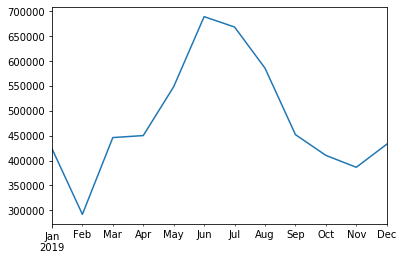

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

df['禾聯碩'].plot()

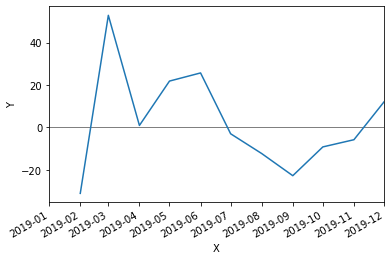

In [10]:
x = pd.to_datetime(df.index)
y = [0,0,0,0,0,0,0,0,0,0,0,0]
plt.plot(x, y, linewidth=1,color='gray')
plt.ylabel("Y")
plt.xlabel("X") 
((df['禾聯碩']/df['禾聯碩'].shift() - 1) *100).plot()
plt.show()

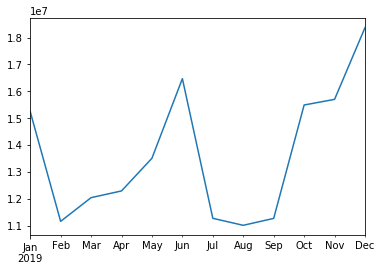

In [11]:
df['緯穎'].plot()

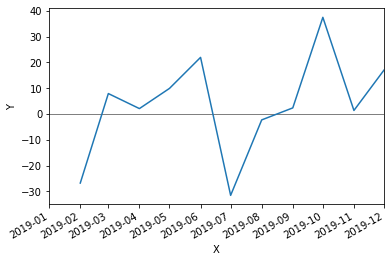

In [12]:
x = pd.to_datetime(df.index)
y = [0,0,0,0,0,0,0,0,0,0,0,0]
plt.plot(x, y, linewidth=1,color='gray')
plt.ylabel("Y")
plt.xlabel("X") 
((df['緯穎']/df['緯穎'].shift() - 1) *100).plot()
plt.show()